### Portfolio Allocation (Part 3): How does combining 2-sectors affect the allocation?

Now that we've seen the different methods of optimizing portfolio allocation using MCS and Scipy, let's indulge our curiosity in understanding how combining auto sector stocks and oil sector stocks affects the allocation given that we want to maximize SR. 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Auto companies
ashok = pd.read_csv('01Ashok_Leyland.csv', index_col='Date', parse_dates=True)
ashok = ashok.loc['2009-1-1':'2013-12-31']
bosch = pd.read_csv('01Bosch.csv', index_col='Date', parse_dates=True)
bosch = bosch.loc['2009-1-1':'2013-12-31']
cummins = pd.read_csv('01CUMMINSIND_data.csv', index_col='Date', parse_dates=True)
cummins = cummins.loc['2009-1-1':'2013-12-31']
eicher = pd.read_csv('01EICHERMOT_data.csv', index_col='Date', parse_dates=True)
eicher = eicher.loc['2009-1-1':'2013-12-31']
mm = pd.read_csv('01M&M_data.csv', index_col='Date', parse_dates=True)
mm = mm.loc['2009-1-1':'2013-12-31']
maruti = pd.read_csv('01MARUTI_data.csv', index_col='Date', parse_dates=True)
maruti = maruti.loc['2009-1-1':'2013-12-31']
mrf = pd.read_csv('01MRF_data.csv', index_col='Date', parse_dates=True)
mrf = mrf.loc['2009-1-1':'2013-12-31']
tata = pd.read_csv('01TATAMOTORS_data.csv', index_col='Date', parse_dates=True)
tata = tata.loc['2009-1-1':'2013-12-31']
tvs = pd.read_csv('01TVSMOTOR_data.csv', index_col='Date', parse_dates=True)
tvs = tvs.loc['2009-1-1':'2013-12-31']

#Oil companies
bpcl = pd.read_csv('02BPCL_data.csv', index_col='Date', parse_dates=True)
bpcl = bpcl.loc['2009-1-1':'2013-12-31']
gail = pd.read_csv('02GAIL_data.csv', index_col='Date', parse_dates=True)
gail = gail.loc['2009-1-1':'2013-12-31']
hp = pd.read_csv('02HINDPETRO_data.csv', index_col='Date', parse_dates=True)
hp = hp.loc['2009-1-1':'2013-12-31']
ioc = pd.read_csv('02IOC_data.csv', index_col='Date', parse_dates=True)
ioc = ioc.loc['2009-1-1':'2013-12-31']
ongc = pd.read_csv('02ONGC_data.csv', index_col='Date', parse_dates=True)
ongc = ongc.loc['2009-1-1':'2013-12-31']
petronet = pd.read_csv('02PETRONET_data.csv', index_col='Date', parse_dates=True)
petronet = petronet.loc['2009-1-1':'2013-12-31']
reliance = pd.read_csv('02RELIANCE_data.csv', index_col='Date', parse_dates=True)
reliance = reliance.loc['2009-1-1':'2013-12-31']

In [6]:
ashok = ashok['adj_close']
bosch = bosch['adj_close']
cummins = cummins['adj_close']
eicher = eicher['adj_close']
mm = mm['adj_close']
maruti = maruti['adj_close']
mrf = mrf['adj_close']
tata = tata['adj_close']
tvs = tvs['adj_close']

bpcl = bpcl['adj_close']
gail = gail['adj_close']
hp = hp['adj_close']
ioc = ioc['adj_close']
ongc = ongc['adj_close']
petronet = petronet['adj_close']
reliance = reliance['adj_close']

In [7]:
stocks_pf = pd.concat([ashok, bosch, cummins, eicher, mm, maruti, mrf, tata, tvs, bpcl, gail, hp, ioc, ongc, petronet, reliance], axis=1)

In [8]:
stocks_pf.columns = ['ashok', 'bosch', 'cummins', 'eicher', 'mm', 'maruti', 'mrf', 'tata', 'tvs', 
                     'bpcl', 'gail', 'hp', 'ioc', 'ongc', 'petronet', 'reliance']

In [9]:
#stocks_pf = pd.read_csv('auto_oil_close.csv', parse_dates=True, index_col='Date')
stocks_pf.head()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs,bpcl,gail,hp,ioc,ongc,petronet,reliance
Date,,,,,,,,,,,,,,,,
2009-01-02,5.985055,2922.206055,127.693787,221.896881,55.967052,516.076172,1982.361694,25.930441,9.790543,27.151831,118.494614,15.977583,63.996998,65.375847,15.842308,269.053467
2009-01-05,6.040645,2925.291992,128.365601,221.804428,57.450584,528.067932,1997.651611,26.283930,9.749146,26.815836,122.146706,15.887396,62.622910,69.695694,16.340376,285.670166
2009-01-06,6.022114,2897.469238,124.838005,219.447266,61.726650,532.191589,1972.799561,27.462313,9.666351,27.883574,120.348808,16.094791,64.569122,69.085663,16.014713,286.726837
2009-01-07,5.781230,2887.640625,114.871361,207.476578,58.682014,535.746460,1834.170044,25.650637,8.652109,27.465424,113.358810,15.926483,62.548656,66.365875,14.233174,251.139954
2009-01-09,5.632993,2869.978516,113.695473,202.438736,60.534004,555.369507,1777.427124,24.413374,7.927649,28.421160,115.584320,16.091791,64.591095,64.299942,13.850048,241.204407


In [10]:
mean_drets = stocks_pf.pct_change(1).mean()
mean_drets

ashok       0.001184
bosch       0.001072
cummins     0.001200
eicher      0.002766
mm          0.001939
maruti      0.001181
mrf         0.002114
tata        0.002598
tvs         0.002130
bpcl        0.001198
gail        0.000700
hp          0.000798
ioc         0.000425
ongc        0.001068
petronet    0.001304
reliance    0.000566
dtype: float64

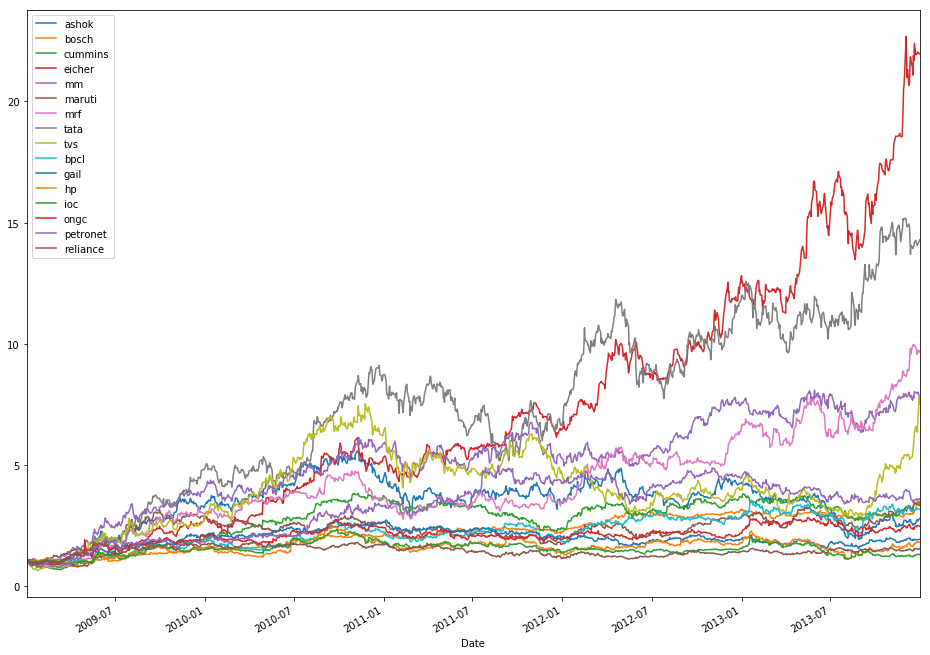

In [11]:
((1+(stocks_pf.pct_change(1))).cumprod()).plot(kind='line', figsize=(16,12))

In [12]:
stocks_pf['tata']['2009-01-01':'2009-10-31'].argmax()

Timestamp('2009-09-22 00:00:00')

In [13]:
stocks_pf.pct_change(1).corr()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs,bpcl,gail,hp,ioc,ongc,petronet,reliance
ashok,1.000000,0.156392,0.306351,0.229677,0.407152,0.361097,0.281972,0.453030,0.365811,0.183013,0.323928,0.202503,0.206008,0.199876,0.312186,0.360186
bosch,0.156392,1.000000,0.188613,0.123518,0.156981,0.146830,0.196917,0.186644,0.195337,0.133033,0.109683,0.138456,0.160316,0.119945,0.123169,0.146050
cummins,0.306351,0.188613,1.000000,0.223470,0.254598,0.215779,0.217238,0.260907,0.256345,0.157622,0.260721,0.180332,0.173095,0.188527,0.189554,0.274361
eicher,0.229677,0.123518,0.223470,1.000000,0.232164,0.188111,0.201535,0.213450,0.186478,0.104762,0.144634,0.107854,0.125826,0.136048,0.153349,0.258133
mm,0.407152,0.156981,0.254598,0.232164,1.000000,0.432468,0.296738,0.448954,0.339260,0.237088,0.310261,0.212186,0.234667,0.292586,0.349846,0.454083
maruti,0.361097,0.146830,0.215779,0.188111,0.432468,1.000000,0.227685,0.372119,0.305222,0.209215,0.266128,0.192375,0.157527,0.196509,0.262493,0.322633
mrf,0.281972,0.196917,0.217238,0.201535,0.296738,0.227685,1.000000,0.298889,0.251923,0.209242,0.181878,0.208434,0.227900,0.155600,0.289926,0.322482
tata,0.453030,0.186644,0.260907,0.213450,0.448954,0.372119,0.298889,1.000000,0.342528,0.165237,0.279156,0.185650,0.195697,0.228365,0.350681,0.439719
tvs,0.365811,0.195337,0.256345,0.186478,0.339260,0.305222,0.251923,0.342528,1.000000,0.186027,0.225855,0.190566,0.176242,0.149994,0.312420,0.289871
bpcl,0.183013,0.133033,0.157622,0.104762,0.237088,0.209215,0.209242,0.165237,0.186027,1.000000,0.282131,0.728499,0.653141,0.277063,0.198742,0.265324


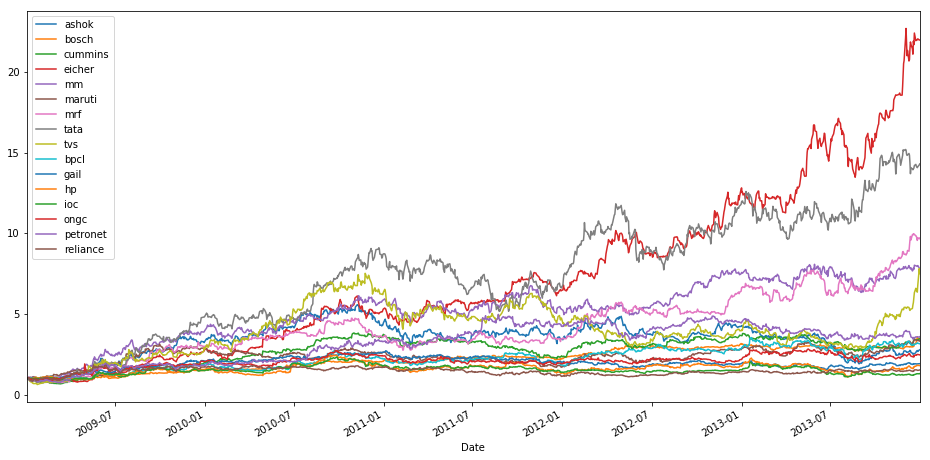

In [14]:
stocks_pf_normed = stocks_pf/stocks_pf.iloc[0]
stocks_pf_normed.plot(figsize=(16,8))

In [15]:
stocks_pf_log_ret = np.log(stocks_pf/stocks_pf.shift(1))
stocks_pf_log_ret.head()

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs,bpcl,gail,hp,ioc,ongc,petronet,reliance
Date,,,,,,,,,,,,,,,,
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.009245,0.001055,0.005247,-0.000417,0.026162,0.022971,0.007683,0.013540,-0.004237,-0.012452,0.030355,-0.005661,-0.021705,0.063986,0.030955,0.059928
2009-01-06,-0.003072,-0.009557,-0.027866,-0.010684,0.071791,0.007779,-0.012519,0.043857,-0.008529,0.039045,-0.014829,0.012970,0.030605,-0.008791,-0.020131,0.003692
2009-01-07,-0.040822,-0.003398,-0.083204,-0.056094,-0.050582,0.006657,-0.072862,-0.068246,-0.110848,-0.015110,-0.059836,-0.010512,-0.031792,-0.040164,-0.117932,-0.132520
2009-01-09,-0.025976,-0.006135,-0.010289,-0.024581,0.031072,0.035973,-0.031425,-0.049437,-0.087447,0.034206,0.019442,0.010326,0.032132,-0.031624,-0.027287,-0.040366


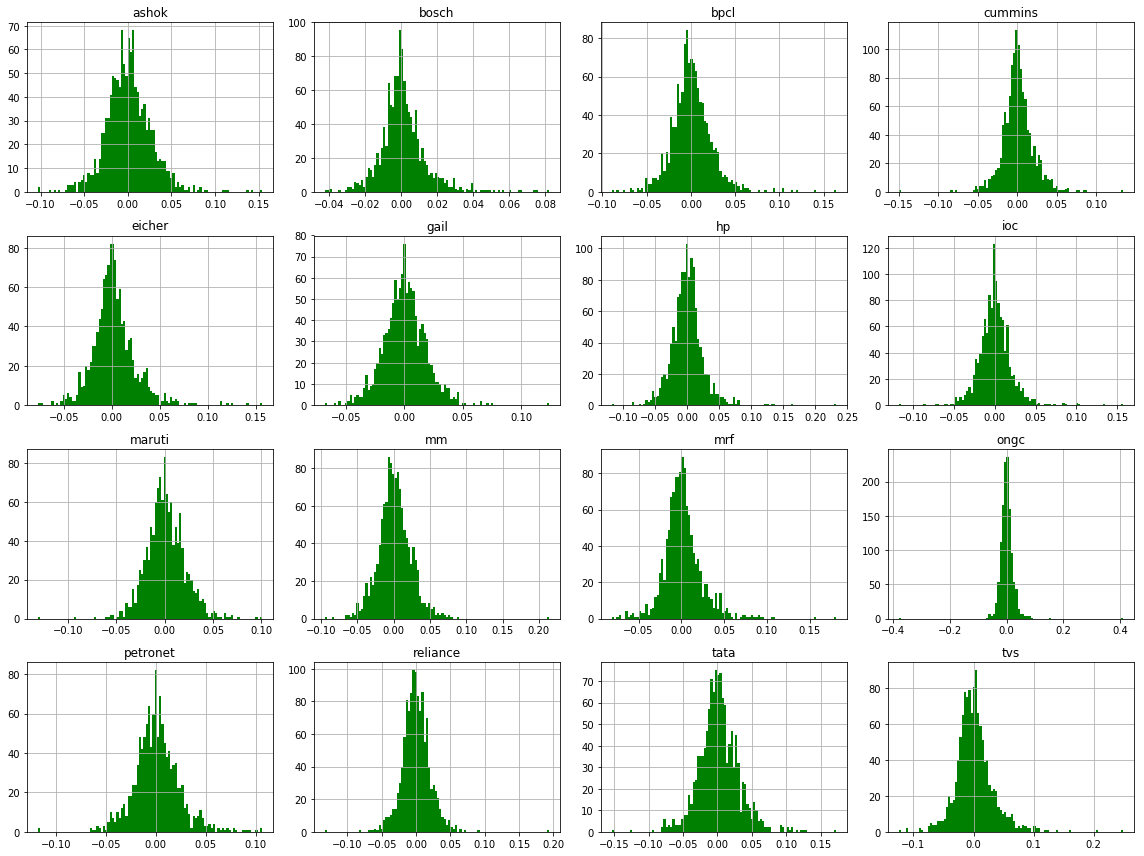

In [16]:
stocks_pf_log_ret.hist(bins=100, figsize=(16,12), color='green')
plt.tight_layout()

In [17]:
stocks_pf_log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ashok,1231.0,0.000834,0.026384,-0.102915,-0.014869,0.000000,0.015462,0.153825
bosch,1231.0,0.000989,0.012815,-0.042442,-0.005892,-0.000162,0.006358,0.082275
cummins,1231.0,0.001012,0.019344,-0.149840,-0.009090,-0.000096,0.009884,0.133649
eicher,1231.0,0.002510,0.022358,-0.076650,-0.009634,0.000670,0.012330,0.156427
mm,1231.0,0.001670,0.023046,-0.094523,-0.011757,0.000782,0.014432,0.213966
maruti,1231.0,0.000976,0.020188,-0.130989,-0.010672,-0.000074,0.012806,0.100847
mrf,1231.0,0.001846,0.022956,-0.081267,-0.010729,-0.000098,0.011370,0.180716
tata,1231.0,0.002161,0.029409,-0.153470,-0.014541,0.000835,0.018950,0.172486
tvs,1231.0,0.001638,0.031149,-0.124409,-0.016000,-0.000851,0.015482,0.248538
bpcl,1231.0,0.000934,0.022886,-0.089364,-0.012096,-0.000519,0.012711,0.164100


In [18]:
stocks_pf_log_ret.mean()*252

ashok       0.210125
bosch       0.249244
cummins     0.255112
eicher      0.632456
mm          0.420816
maruti      0.246030
mrf         0.465245
tata        0.544503
tvs         0.412681
bpcl        0.235370
gail        0.134421
hp          0.121838
ioc         0.055815
ongc        0.185259
petronet    0.261771
reliance    0.088460
dtype: float64

In [19]:
stocks_pf_log_ret.cov()*252

,ashok,bosch,cummins,eicher,mm,maruti,mrf,tata,tvs,bpcl,gail,hp,ioc,ongc,petronet,reliance
ashok,0.175425,0.013467,0.039094,0.034420,0.061953,0.048099,0.044125,0.088852,0.076128,0.028013,0.038969,0.033941,0.027380,0.034353,0.047898,0.049458
bosch,0.013467,0.041382,0.011743,0.009037,0.011702,0.009605,0.014833,0.017589,0.020089,0.009947,0.006465,0.011358,0.010454,0.009994,0.009252,0.009864
cummins,0.039094,0.011743,0.094293,0.023808,0.027833,0.020798,0.024652,0.036859,0.039216,0.017358,0.022950,0.021448,0.016481,0.023508,0.021372,0.027196
eicher,0.034420,0.009037,0.023808,0.125965,0.030017,0.021260,0.026567,0.035268,0.033434,0.013682,0.015003,0.015385,0.014141,0.020838,0.020413,0.029974
mm,0.061953,0.011702,0.027833,0.030017,0.133845,0.050360,0.040138,0.076287,0.062161,0.031287,0.032351,0.030380,0.026643,0.042247,0.046590,0.053544
maruti,0.048099,0.009605,0.020798,0.021260,0.050360,0.102704,0.026955,0.055298,0.048451,0.024321,0.024492,0.024510,0.015895,0.025597,0.030784,0.033423
mrf,0.044125,0.014833,0.024652,0.026567,0.040138,0.026955,0.132796,0.051768,0.047554,0.028002,0.019514,0.030559,0.026589,0.023695,0.039213,0.039331
tata,0.088852,0.017589,0.036859,0.035268,0.076287,0.055298,0.051768,0.217952,0.080206,0.028102,0.037711,0.033833,0.028879,0.043831,0.060218,0.067604
tvs,0.076128,0.020089,0.039216,0.033434,0.062161,0.048451,0.047554,0.080206,0.244513,0.034260,0.032963,0.038618,0.028291,0.031270,0.057262,0.047936
bpcl,0.028013,0.009947,0.017358,0.013682,0.031287,0.024321,0.028002,0.028102,0.034260,0.131990,0.029602,0.105926,0.075668,0.041741,0.026592,0.031494


#### Random Allocation using Monte-Carlo to Evaluate Portfolio Performance

In [27]:
num_ports = 25000

all_weights = np.zeros((num_ports,len(stocks_pf.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(16))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((stocks_pf_log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(stocks_pf_log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [28]:
sharpe_arr.max()

1.8295327855970229

In [29]:
sharpe_arr.argmax()

14332

In [31]:
all_weights[14332,:]

array([ 0.0266483 ,  0.1309508 ,  0.08929487,  0.14054977,  0.11136029,
        0.07093426,  0.09410376,  0.1037205 ,  0.11692778,  0.0073788 ,
        0.03078844,  0.00843214,  0.03139065,  0.00363166,  0.01664839,
        0.01723958])

In [32]:
max_sr_ret = ret_arr[14332]
max_sr_vol = vol_arr[14332]

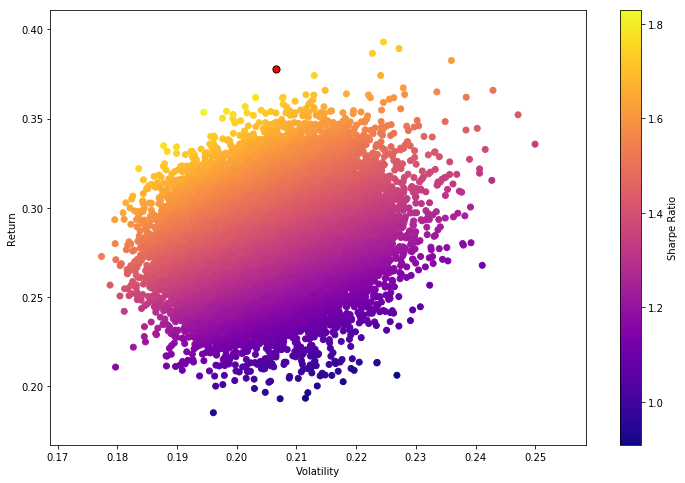

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

Here's a summary of allocation between different stocks:

01 Ashok  2.7%

02 Bosch  13.1%

03 Cummins 8.9%

04 Eicher 14.1%

05 Mahindra  11.1%

06 Maruti  7.1%

07 MRF  9.4%

08 Tata  10.4%

09 TVS 11.7%

10 BPCL 0.7%

11 GAIL ~3.1%

12 HP  0.8%

13 IOC  3.1%

14 ONGC  0.3%

15 Petronet 1.7%

16 Reliance 1.7%

We see that the allocations are heavily skewed in favour of auto stocks. This is not surprising since we saw that the auto stock portfolio had higher SR (~2.2) vis-a-vis oil PF SR (~0.9), and we optimized our allocations based on SR. 

A more interesting outcome to note is that a portfolio comprising both oil and auto stocks reduces the overall volatility of oil stock PF (a reduction of about 20%) at for much smaller trade-off with respect to portfolio returns of auto stocks (a reduction of about 11%). 

|Portfolio | SR |Volatility | Returns |   
|------|----------------|-----------------------|
| auto_stocks | 2.17  | 0.20 | 42.4%
| oil_stocks | 0.90  | 0.25 |  22.3%
| combined | 1.83  | 0.20 | 37.8%



In conclusion, let us understand that in many cases performance of oil companies is related to automotive companies. And this correlation should be accounted for while constructing the portfolio. But it should also be kept in mind that returns from oil companies may not necessarily be determined by returns from auto companies due to the nature of the oil industry (oil companies many countries are heavily government administered, but auto companies tend be left to the private sector and market forces). 